***
# <h1 align="center">Proyecto Final Economía Matemática I</h1>
<h2 align="center">Aplicación de Modelo SIR a Evolución de Casos de Covid 19</h2>
<h3 align="center"> <font color='gray'>Tomás Bordaberry y Erika Guani </font></h3>
<h4 align="center"> <font color='gray'>Noviembre 2020</font></h4>

***

</center><img src="https://ichef.bbci.co.uk/news/800/cpsprodpb/14A35/production/_115033548_gettyimages-1226314512.jpg" width=700></center>

***

In [1]:
#Importo Librerías
import os
import numpy as np
import matplotlib.pyplot as plt

#Adicionales a código original
import matplotlib.ticker as mtick
import scipy.integrate as integrate
from sklearn import metrics
import pandas as pd
import networkx as nx



# Seteo el directorio de trabajo. Aquí es donde se guardarán sus gráficas.
wd = "/Users/Tomas/Desktop/UM /S4/Economia Matematica/Proyecto Final/Graficas"  #CAMBIAR DIRECTORIO PARA GUARDAR LAS GRAFICAS
os.chdir(wd)

In [2]:
#Creamos la función ecuaciones_sir
def ecuaciones_sir(y, T, N, beta, gamma):
    """
    Esta función halla el sendero de los infectados, recuperados, y
    susceptibles en el modelo SIR por una cantidad de t días.
    
    Parámetros
    ----------
    y : tuple
        Contiene los valores inciales de S, I y R
    T:  array
        Cantidad de días que se quiere analizar.
    N : integer
        Población total
    beta : float/integer
        Tasa de efectiva de contagio dado contacto con infectado
    gamma : float/integer
        Proporción de la población infectada que se recupera por día
        
    Retorna
    ----------
    
    Tres arrays numpy con T elementos. Los arrays corresponden a la
    evolución de los casos de infectados (I), susceptibles (S) y 
    recuperados (R).

    """
    S0, I0, R0 = y
    S = np.zeros(T)
    I = np.zeros(T)
    R = np.zeros(T)
    

    
    S[0] = S0
    I[0] = I0
    R[0] = R0
    

     
    
    
    for t in range(0,T-1):
        S[t+1] = S[t]-((S[t]*beta*I[t])/N)
        I[t+1] = I[t]+((S[t]*beta*I[t])/N)-(I[t]*gamma)
        R[t+1] = R[t]+ (I[t]*gamma)
        

        
    return S, I, R



#### 1) Debido a que en su columna utiliza el modelo SIR, explique la intuición detrás de los parámetros 𝛾 y 𝛽 en el modelo.

- El parámetro 𝛾 (Gamma) es la proporción de los infectados que se recupera de un período (día) al otro. Es decir,

$$\begin{eqnarray}
𝛾 &=& \frac{1}{NºPromedioDías de Recuperacion} \\
\end{eqnarray}$$

- Gamma es la tasa de recuperación, es decir que es la tasa por unidad de tiempo a la cual los individuos infectados se recuperan. Por lo tanto, intuitivamente se podría decir que es el ratio entre el número de recuperados y el número de infectados por unidad de tiempo. 

- El parámetro 𝛽 (Beta) es la tasa efectiva de contagio dado un contacto con infectado. Muestra que tan rápido se transmite la infección de un individuo a otro. En otras palabras, muestra la probabiliad de que una persona susceptible se contagie de un infectado, dado que se lo curzó. Es decir,

$$\begin{eqnarray}
𝛽 &=& P(&Infección &/& Contacto&) \\
\end{eqnarray}$$

####  2) Utilicé el modelo SIR para predecir la evolución de los infectados, susceptibles y recuperados en los próximos 6 meses.  

Para ello asuma: 
- I0 = 4,
- N = 3.5 millones 
- Una tasa de recuperación promedio de 21 días 
- Una tasa de contacto efectiva igual a 0.35. 

Comente los resultados de su predicción utilizando una gráfica.

In [3]:
# Hallamos el sendero de infectados, recuperados y susceptibles ---------------

# Primero definimos las condiciones iniciales.

# Población total
N = 3500000

# Número inicial de personas infectadas
I0 = 4

# Número inicial de recuperados
R0 = 0

# El resto de la población es susceptible a contraer la enfermedad
S0 = N - I0 - R0

# Tasa de contacto
beta = 0.35

# Proporción de los infectados que se recuperan por día. El denominador es
# cantidad de días promedio que tarda un infectado en recuperarse
gamma = (1/21) 

# Cantidad de días a analizar
T = 180  #(6 x 30)

# Vector de condiciones iniciales
y0 = S0, I0, R0

# Hallar el sendero de cada una de las tres variables utilizando la función
# ecuaciones_sir
S, I, R = ecuaciones_sir(y0,T, N,beta,gamma)



#...



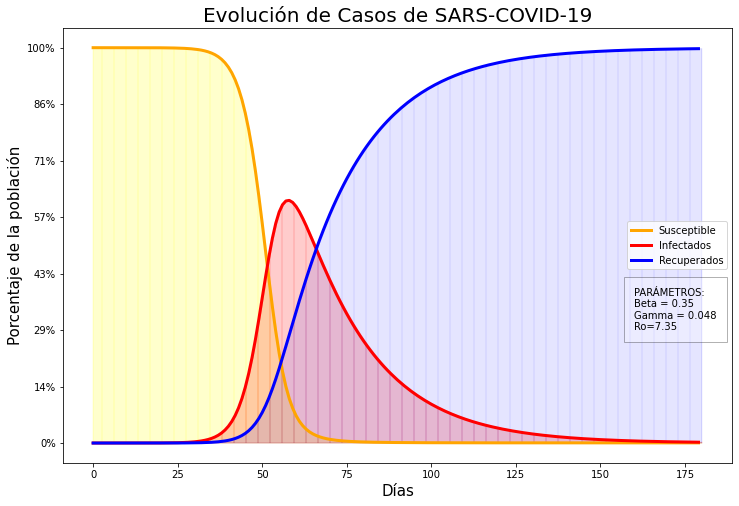

In [4]:
# Grafiquemos la evolución de las tres variables a lo largo del tiempo -------

fig, ax = plt.subplots(figsize=(12,8))

# variable x = evolución de los días
t = np.linspace(0, T, T)

ax.plot(S,color ='orange', linewidth =3, label = 'Susceptible' )
ax.fill_between(t,S, color = 'yellow', alpha = 0.2, hatch = '|', joinstyle = 'round')

ax.plot(I,color = 'red', linewidth = 3, label = 'Infectados')
ax.fill_between(t,I, color = 'red', alpha = 0.2, hatch = '|', joinstyle = 'round')

ax.plot(R, color = 'blue', linewidth = 3, label = 'Recuperados')
ax.fill_between(t,R, color = 'blue', alpha = 0.1, hatch = '|', joinstyle = 'round')

plt.title('Evolución de Casos de SARS-COVID-19', fontsize =20)

fmt = '%.0f%%' 
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 3500000))


ax.legend()
ax.text(160, 1000000, r"PARÁMETROS: ""\n"r"Beta = 0.35 ""\n"r"Gamma = 0.048""\n"r"Ro=7.35" , bbox={'facecolor':'white', 'alpha':0.3, 'pad':10})

plt.xlabel('Días', fontsize=15)
plt.ylabel('Porcentaje de la población',fontsize=15)
#...

plt.savefig("evolución_casos.png")
plt.show()


In [5]:
pico = str(round(I.max(),0))
print ("En el máximo llega a haber:   " + pico + "   infectados")

np.where(I == np.max(I))


En el máximo llega a haber:   2148205.0   infectados


(array([58]),)

In [6]:
I[25]

2952.125950728556

In [7]:
I[179]

7379.669646742846

- La gráfica muestra la solución numérica de cómo evolucionan las tres variables del modelo sir durante 6 meses, donde se observa que el número de infectados aumenta hasta un máximo y después decrece, mientras que el número de suceptibles comienza constante pero luego decrece y el número de recuperados aumenta con el tiempo.  
- Observando la gráfica se puede decir que en los primeros 25 dias no hay practicamente contagiados pero esto no es muy certero. En el día 25 hay 2953 personas infectadas, este número en términos matemáticos es el 0.08437% de la poblacion, pero aplicado al tema que estamos trabajando, que se trata de una enfermedad infecciosa es un número relevante. 
- El máximo número de personas infectadas es a los 58 días del paciente 0 y luego comienza a decrecer dramaticamente
- En este pico, hay 2148205 personas infectadas lo que representa un 61.38% de la población. 
- Con más de la mitad de la población cursando la enfermedad simultáneamente, se puede afirmar con certeza que los hospitales estarían colapsados ya que ningún hospital cuenta con los suficientes recursos para atender o en algunos casos incluso internar a tantos pacientes a la vez, lo que puede generar que los números de fallecidos sean grandes.
- Una vez que la poblacion se comienza a curar, el número de infectados decrece mientras que el de recuperados crece, se genera una "Heard Immunity" donde la mayoría de las personas ya cursaron la enfermedad y no pueden contagiar ni ser contagiados. 
- El mínimo de infectados es al comienzo del modelo cuando hay 4 infectados, lo que quiere decir que para este período todavía no se erradicó la enfermedad porque en el último período que parece también llegar a un mínimo el número de infectados, este es 7380. 

### 3) ¿Cómo puede ver en la gráfica, si luego del brote el virus ha infectado a toda la población?

- Un supuesto de este modelo es que la población se clasifica en tres grupos: suceptibles, infectados y recuperados. Los suceptibles son el número de individuos que son propensas a la enfermedad, los infectados son el número de individuos que tienen la enfermedad y que pueden infectar a las personas suceptibles y los recuperados son el número de individuos que no pueden contraer la enfermedad, es decir que son inmunes. Cada individuo de la poblacion pertenece a un grupo, no puede haber alguien fuera de esta clasificación. 

- Por lo tanto un método para ver si toda la población se infectó durante estos 6 meses, es visualizar en la gráfica el número de suceptibles en el último período. Si el número de suceptibles llega a cero, quiere decir que toda la población ya se infectó debido a que en ese último período toda la poblacion está diviida en los grupos restantes, recuperados o infectados y para permanecer a alguno de esos dos grupos el individuo tiene que estar infectado o ya haber contraido la enfermedad. Debido a que en el último período hay 1334 individuos que permanecen al grupo de suceptibles, podemos decir que no se infectó toda la población todavía.

- El siguiente grafico destaca la variable de los suceptibles (amarillo)


In [8]:
S[179]

1334.046323943814

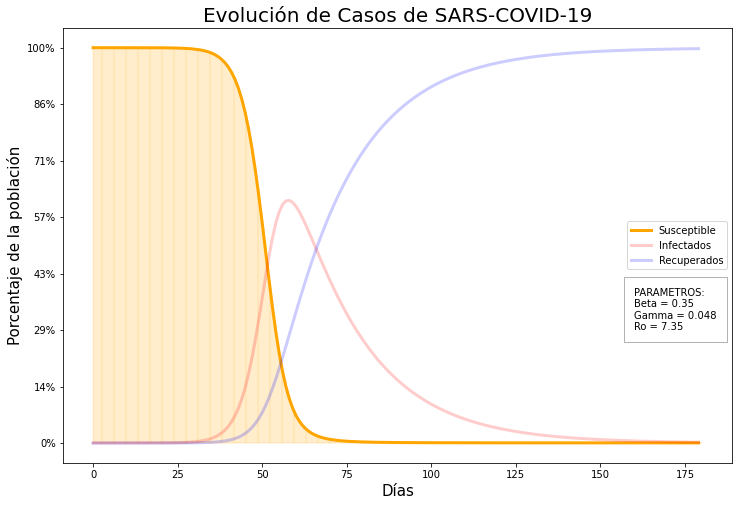

In [9]:
# Grafiquemos la evolución de las tres variables a lo largo del tiempo -------

fig, ax = plt.subplots(figsize=(12,8))

# variable x = evolución de los días
t = np.linspace(0, T, T)
ax.plot(S,color ='orange', linewidth =3, label = 'Susceptible'  )
ax.fill_between(t,S, color = 'orange', alpha = 0.2, hatch = '|', joinstyle = 'round' )

ax.plot(I,color = 'red', linewidth = 3, label = 'Infectados' , alpha =.2)


ax.plot(R, color = 'blue', linewidth = 3, label = 'Recuperados', alpha =.2)


plt.title('Evolución de Casos de SARS-COVID-19', fontsize =20)

fmt = '%.0f%%' 
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 3500000))


ax.legend()
ax.text(160, 1000000, r"PARAMETROS: ""\n"r"Beta = 0.35 ""\n"r"Gamma = 0.048""\n"r"Ro = 7.35" , bbox={'facecolor':'white', 'alpha':0.3, 'pad':10})

plt.xlabel('Días', fontsize=15)
plt.ylabel('Porcentaje de la población',fontsize=15)


plt.savefig("evolución_casos_highlight_suceptibles.png")
plt.show()



- Otra forma de visualizar si el virus ha infectado a toda la población, es calculando el área por debajo de la curva de la variable I y dividirla entre el número promedio de días que tarda un individuo en recuperarse, en este modelo es 21 días. Esto es porque I representa los casos activos, por lo que un individuo infectado está en el grupo de Infectados por varios días(se toma el promedio) y se divide entre este promedio así no se tiene en cuenta a un mismo individuo más de una vez. Si este resultado llega a 3.5 millones, significa que a lo largo del tiempo se infecto toda la población. Como el resultado es 3491463 que es menor a 3.5 millones, en el período de 6 meses aún no se infectó toda la población. 


In [10]:
integral = integrate.simps(I)

print(integral/21)

3491463.3599213944


- Un último método para visulaizar si luego del brote del virus se ha infectado toda la población, es graficando los casos nuevos en función del tiempo y calcular el área debajo de la curva. Si esta área da 3.5 millones es que ya se infectó toda la población. 
- Para graficar se definió una nueva variable "casos_nuevos"
- Como el área es 3498661.37515138, que es menor a 3.5 millones, no se ha infectado toda la población todavía. 
- En el último período, todavia hay casos nuevos: 1,0344

In [11]:
def casos_nuevos(y, T, N, beta, gamma):
    
    S0, I0, R0 = y
    S = np.zeros(T)
    I = np.zeros(T)
    R = np.zeros(T)
    
    C = np.zeros(T) #Casos nuevos
    
    S[0] = S0
    I[0] = I0
    R[0] = R0
    
    C[0] = I0 #casos nuevos
     
    
    
    for t in range(0,T-1):
        S[t+1] = S[t]-((S[t]*beta*I[t])/N)
        I[t+1] = I[t]+((S[t]*beta*I[t])/N)-(I[t]*gamma)
        R[t+1] = R[t]+ (I[t]*gamma)
        C[t+1] = ((S[t]*beta*I[t])/N) #casos nuevos
        
    return C

C = casos_nuevos(y0, T, N, beta, gamma)

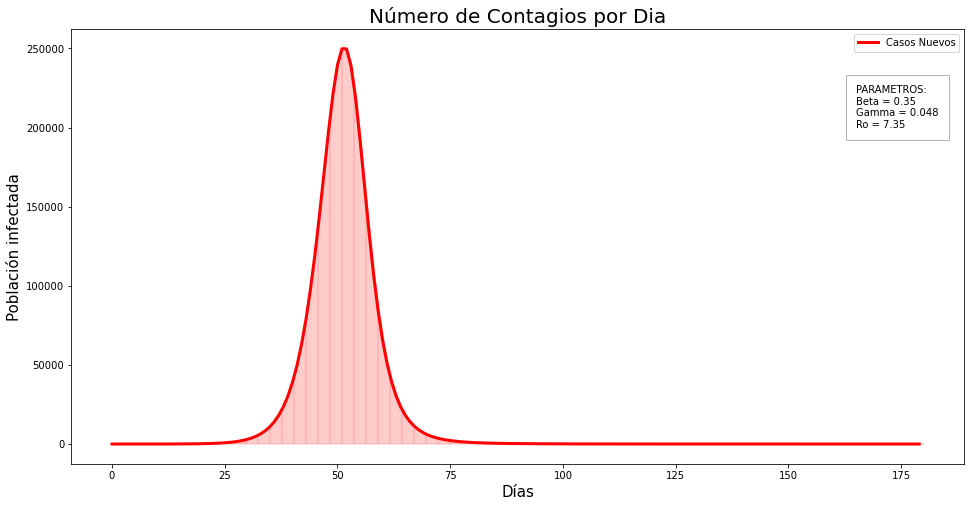

In [12]:
fig, ax = plt.subplots(figsize=(16,8))

# variable x = evolución de los días
t = np.linspace(0, T, T)
ax.plot(C,color ='red', linewidth =3, label = 'Casos Nuevos'  )
ax.fill_between(t,C, color = 'red', alpha = 0.2, hatch = '|', joinstyle = 'round' )


plt.title('Número de Contagios por Dia', fontsize =20)
plt.xlabel('Días', fontsize=15)
plt.ylabel('Población infectada',fontsize=15)



ax.legend()
ax.text(165, 200000, r"PARAMETROS: ""\n"r"Beta = 0.35 ""\n"r"Gamma = 0.048""\n"r"Ro = 7.35" , bbox={'facecolor':'white', 'alpha':0.3, 'pad':10})


plt.savefig("numero_de_contagios_por_dia.png")
plt.show()


In [13]:
integral = integrate.simps(C)
print(integral)

3498663.2241987144


In [14]:
S[178] - S[179]

1.0343627134675444

In [15]:
C[179]

1.0343627134675368

- Teniendo en cuenta los tres métodos podemos llegar a la misma conclusión. Técnicamente no se infectó toda la población, sin embargo solo faltan infectarse aproximadamente un poco más de 1000 personas, que en una población de 3.5 millones es muy poco, es el 0,029% por lo tanto se puede decir que practicamente se contagió toda la población. 

### 4)  El parámetro más importante en el modelo SIR es el R0. Este parámetro es conocido como número reproductivo básico y no debe ser confundido con el número de recuperados en el momento cero. 
####  Expliqué la intuición de dicho parámetro, cómo se calcula, y el o los supuestos que tiene por detrás.

- El número reproductivo básico muestra la intensidad de la enfermedad infecciosa, COVID-19. Nos indica el número de nuevos infectados, en promedio, por un solo infectado a lo largo del período de duración de la enfermedad. Es decir, que es el promedio de infecciones que causa un undividuio contagiado. 



$$\begin{eqnarray}
R_{0} &=& \frac{β}{ γ} \\
\end{eqnarray}$$

- Brinda información acerca de si la enfermedad se va a propagar o no y de la velocidad con que la enfermedad puede propagarse en una población de individuos fija, determinada

### 5). Las predicciones que surgen del modelo SIR son muy sensibles al valor de R0 elegido. Debido a esto, en su columna, quiere mostrar cómo puede variar la evolución de los infectados según el valor de R0 utilizado.

#### Para ello, muestre en una sola gráfica la evolución de infectados en Uruguay durante 6 meses para los siguientes valores de R0: 0.5; 1; 1.5 y 2. Comente y explique sus resultados.

- El Ro depende de dos parámetros, β y γ. Por lo tanto su valor puede cambiar cuando alguno de estos dos parámetros varía, ya sea que disminuye o aumenta la tasa de contacto o disminuye o aumenta la proporción de la población infectada que se recupera por día. Se analizarán ambos casos. 

#### Caso en el que β cambia mientras que γ permanece constante.

Esto significa que el tiempo en promedio en que un individuo demora en recuperarse del COVID permanece constante mientras que la tasa de contacto varía. Esta puede variar dependiendo de varios factores, por ejemplo el distanciamiento social, el uso del tapabocas, cuarentena, cerrar escuelas y lugares donde se acumula muchas personas como los shoppings reduce la tasa de contacto. Mientras que la tasa de contacto aumenta cuando se reinvierte la situación. Es decir, cuando luego de tomar las medidas anteriores donde las personas están distanciadas, se vuelve hablilitar las escuelas, los clubs y se permite que las personas entren un poco más en contacto.

In [16]:
# Hallamos el sendero de infectados, recuperados y susceptibles ---------------

# Primero definimos las condiciones iniciales.

# Población total
N = 3500000

# Número inicial de personas infectadas
I0 = 4

# Número inicial de recuperados
R0 = 0

# El resto de la población es susceptible a contraer la enfermedad
S0 = N - I0 - R0

# Tasa de contacto
beta1 = 0.5*gamma

beta2 = gamma

beta3 = 1.5*gamma

beta4 = 2*gamma

# Proporción de los infectados que se recuperan por día. El denominador es
# cantidad de días promedio que tarda un infectado en recuperarse
gamma = (1/21) 

# Cantidad de días a analizar
T = 180  #(6 x 30)

# Vector de condiciones iniciales
y0 = S0, I0, R0

# Hallar el sendero de cada una de las tres variables utilizando la función
# ecuaciones_sir
S1, I1, R1 = ecuaciones_sir(y0,T, N,beta1,gamma)
S2, I2, R2 = ecuaciones_sir(y0,T, N,beta2,gamma)
S3, I3, R3 = ecuaciones_sir(y0,T, N,beta3,gamma)
S4, I4, R4 = ecuaciones_sir(y0,T, N,beta4,gamma)



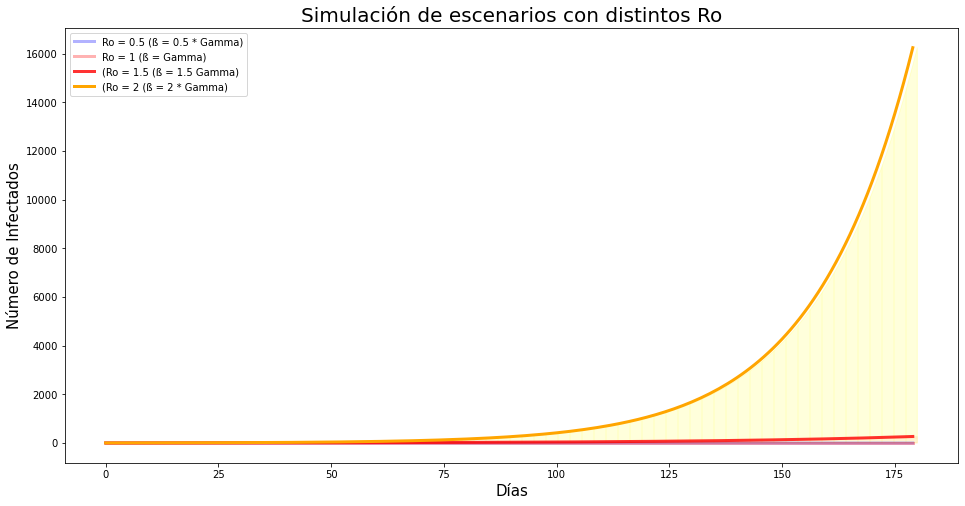

In [17]:
fig, ax = plt.subplots(figsize=(16,8))

# variable x = evolución de los días
t = np.linspace(0, T, T)
ax.plot(I1,color ='blue', alpha = 0.3 , linewidth =3, label = 'Ro = 0.5 (ß = 0.5 * Gamma)'  )
ax.plot(I2,color ='red', alpha = 0.3 , linewidth =3, label = 'Ro = 1 (ß = Gamma)'  )
ax.plot(I3,color ='red', alpha = 0.8, linewidth =3, label = '(Ro = 1.5 (ß = 1.5 Gamma)'  )
ax.plot(I4,color ='orange', alpha =  1, linewidth =3, label = '(Ro = 2 (ß = 2 * Gamma)'  )

ax.fill_between(t,I3, color = 'red', alpha = 0.05, hatch = '-', joinstyle = 'round' )
ax.fill_between(t,I4, color = 'yellow', alpha = 0.14, hatch = '|', joinstyle = 'round' )





plt.title('Simulación de escenarios con distintos Ro', fontsize =20)



ax.legend()

plt.xlabel('Días', fontsize=15)
plt.ylabel('Número de Infectados',fontsize=15)

plt.savefig("Simulacion_de_escenarios_con_distintos_Ro_(beta).png")
plt.show()



In [18]:
# Hallamos el sendero de infectados, recuperados y susceptibles ---------------

# Primero definimos las condiciones iniciales.

# Población total
N = 3500000

# Número inicial de personas infectadas
I0 = 4

# Número inicial de recuperados
R0 = 0

# El resto de la población es susceptible a contraer la enfermedad
S0 = N - I0 - R0

# Tasa de contacto
beta1 = 0.5*gamma

beta2 = gamma

beta3 = 1.5*gamma

beta4 = 2*gamma

# Proporción de los infectados que se recuperan por día. El denominador es
# cantidad de días promedio que tarda un infectado en recuperarse
gamma = (1/21) 

# Cantidad de días a analizar
T = 580  
# Vector de condiciones iniciales
y0 = S0, I0, R0

# Hallar el sendero de cada una de las tres variables utilizando la función
# ecuaciones_sir
S1, I1, R1 = ecuaciones_sir(y0,T, N,beta1,gamma)
S2, I2, R2 = ecuaciones_sir(y0,T, N,beta2,gamma)
S3, I3, R3 = ecuaciones_sir(y0,T, N,beta3,gamma)
S4, I4, R4 = ecuaciones_sir(y0,T, N,beta4,gamma)


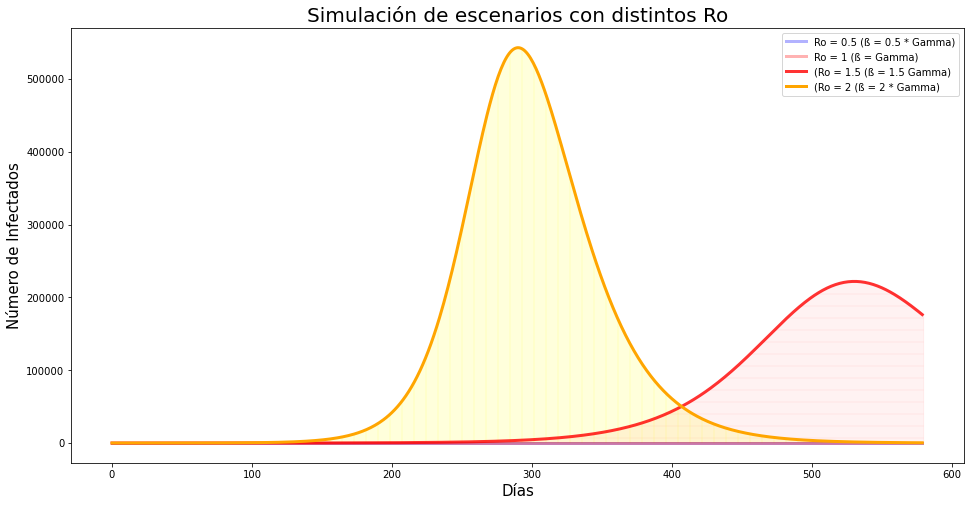

In [19]:
fig, ax = plt.subplots(figsize=(16,8))

# variable x = evolución de los días
t = np.linspace(0, T, T)
ax.plot(I1,color ='blue', alpha = 0.3 , linewidth =3, label = 'Ro = 0.5 (ß = 0.5 * Gamma)'  )
ax.plot(I2,color ='red', alpha = 0.3 , linewidth =3, label = 'Ro = 1 (ß = Gamma)'  )
ax.plot(I3,color ='red', alpha = 0.8, linewidth =3, label = '(Ro = 1.5 (ß = 1.5 Gamma)'  )
ax.plot(I4,color ='orange', alpha =  1, linewidth =3, label = '(Ro = 2 (ß = 2 * Gamma)'  )

ax.fill_between(t,I3, color = 'red', alpha = 0.05, hatch = '-', joinstyle = 'round' )
ax.fill_between(t,I4, color = 'yellow', alpha = 0.14, hatch = '|', joinstyle = 'round' )


plt.title('Simulación de escenarios con distintos Ro', fontsize =20)

plt.xlabel('Días', fontsize=15)
plt.ylabel('Número de Infectados',fontsize=15)

ax.legend()

plt.savefig("Simulacion_de_escenarios_con_distintos_Ro_zoom_(beta).png")
plt.show()


###  Visualizamos solo el Ro = 1 y Ro = 0.5 , para tener una mejor idea de como se comporta el modelo con esos parametros

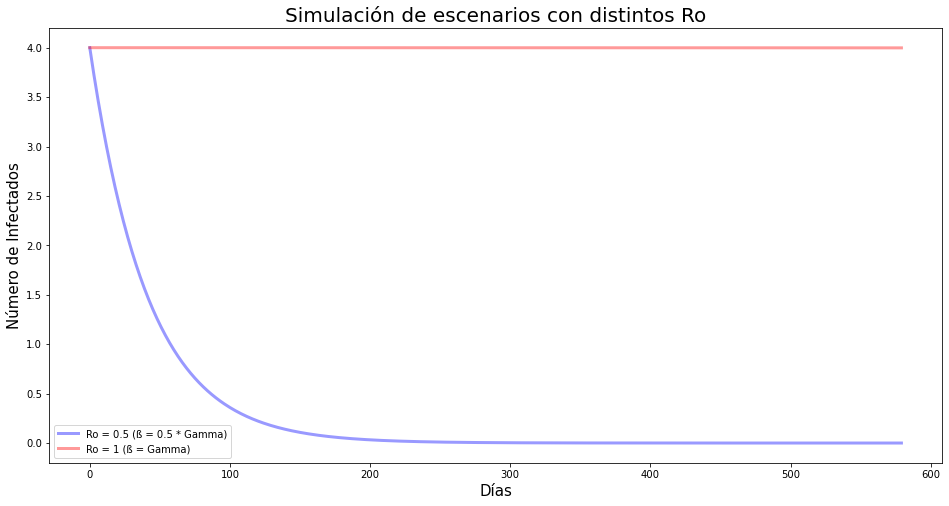

In [20]:
fig, ax = plt.subplots(figsize=(16,8))

# variable x = evolución de los días
t = np.linspace(0, T, T)
ax.plot(I1,color ='blue', alpha = 0.4 , linewidth =3, label = 'Ro = 0.5 (ß = 0.5 * Gamma)'  )
ax.plot(I2,color ='red', alpha = 0.4 , linewidth =3, label = 'Ro = 1 (ß = Gamma)'  )
plt.title('Simulación de escenarios con distintos Ro', fontsize =20)



ax.legend()

plt.xlabel('Días', fontsize=15)
plt.ylabel('Número de Infectados',fontsize=15)

plt.savefig("simulacion_de_escenarios_con_distintos_Ro_1_y_05.png")
plt.show()



#### Comentarios de los resultados obtenidos
- Se hizo una segunda gráfica, cambiando el tiempo de duración de la enfermedad así se puede observar mejor el comportamiento de la variable de los infectados.  
- En la gráfica se puede observar que cuánto mayor es el valor de R0, más rápidamente progresa la epidemia. 
- Se puede visualizar que en los primeros dos casos (cuando R0= 0.5 y R0=1) la variable I, que mide el número de infectados en función del tiempo, no posee un pico. Es decir que comparado con la situación inicial que se analizó previamente(pregunta 1-3), esta variable se comporta distinto, esto significa que no crece hasta cierto punto y luego decrece, sino que se mantiene constante en 4, que es el número inicial de infectados en la población (R0=1) o decrece (R0=0.5).
- Sin embargo, en los casos de  R0= 1.5 y RO= 2, la variable I sí tiene un pico, crece hasta cierto punto y luego comienza a decrecer. Se puede ver que a menor  R0, el pico de la infección se retrasa en el tiempo y a su vez también se reduce el número máximo de personas infectadas de forma considerable. 
Para un R0= 1.5  el pico de la epidemia tiene lugar 530 días después del inicio de la epidemia, con un total de  222029 infectados, (un 6,34% de la población). Para un R0=2, el pico de la epidemia tiene lugar 290 días después del inicio de la epidemia con un total de 543126 infectados(15,52% de la población).

In [21]:
pico = str(round(I1.max(),0))
print ("En el máximo llega a haber:   " + pico + "   infectados")

np.where(I1 == np.max(I1))

En el máximo llega a haber:   4.0   infectados


(array([0]),)

In [22]:
pico = str(round(I2.max(),0))
print ("En el máximo llega a haber:   " + pico + "   infectados")

np.where(I2 == np.max(I2))

En el máximo llega a haber:   4.0   infectados


(array([0]),)

In [23]:
pico = str(round(I3.max(),0))
print ("En el máximo llega a haber:   " + pico + "   infectados")

np.where(I3 == np.max(I3))

En el máximo llega a haber:   222029.0   infectados


(array([530]),)

In [24]:
pico = str(round(I4.max(),0))
print ("En el máximo llega a haber:   " + pico + "   infectados")

np.where(I4 == np.max(I4))

En el máximo llega a haber:   543126.0   infectados


(array([290]),)

#### Caso en el que γ cambia mientras que β permanece constante.
- En este caso la tasa de contacto permanece constante y lo que varía son los días en promedio en lo que un individuo demora en recuperarse del COVID. Este caso es más extraño ya que hoy en día todavía no está muy claro si existe un antiviral que ayude a los infectados a recuperarse más rápido, es más, solo hay un medicamento que se está utilizando hoy en día.  El remdesivir fue aprobado por la FDA como el primer medicamento para tratar COVID-19 pero las investigaciones sugieren que puede proporcionar solo un modesto beneficio a los pacientes.
El parámetro γ en la realidad se comporta más como un dato y no como una variable sobre la cual el gobierno pueda incidir. Pero bajo el supuesto de que existe una forma de recuperar a los infectados  en menor tiempo, se puede visualizar de esta forma.


In [25]:
# Hallamos el sendero de infectados, recuperados y susceptibles ---------------

# Primero definimos las condiciones iniciales.

# Población total
N = 3500000

# Número inicial de personas infectadas
I0 = 4

# Número inicial de recuperados
R0 = 0

# El resto de la población es susceptible a contraer la enfermedad
S0 = N - I0 - R0

# Tasa de contacto
beta = 0.35


# Proporción de los infectados que se recuperan por día. El denominador es
# cantidad de días promedio que tarda un infectado en recuperarse
gamma1 = beta/0.5 

gamma2 = beta/1

gamma3 = beta/1.5

gamma4 = beta/2

# Cantidad de días a analizar
T = 180  
# Vector de condiciones iniciales
y0 = S0, I0, R0

# Hallar el sendero de cada una de las tres variables utilizando la función
# ecuaciones_sir
S1, I1, R1 = ecuaciones_sir(y0,T, N,beta,gamma1)
S2, I2, R2 = ecuaciones_sir(y0,T, N,beta,gamma2)
S3, I3, R3 = ecuaciones_sir(y0,T, N,beta,gamma3)
S4, I4, R4 = ecuaciones_sir(y0,T, N,beta,gamma4)


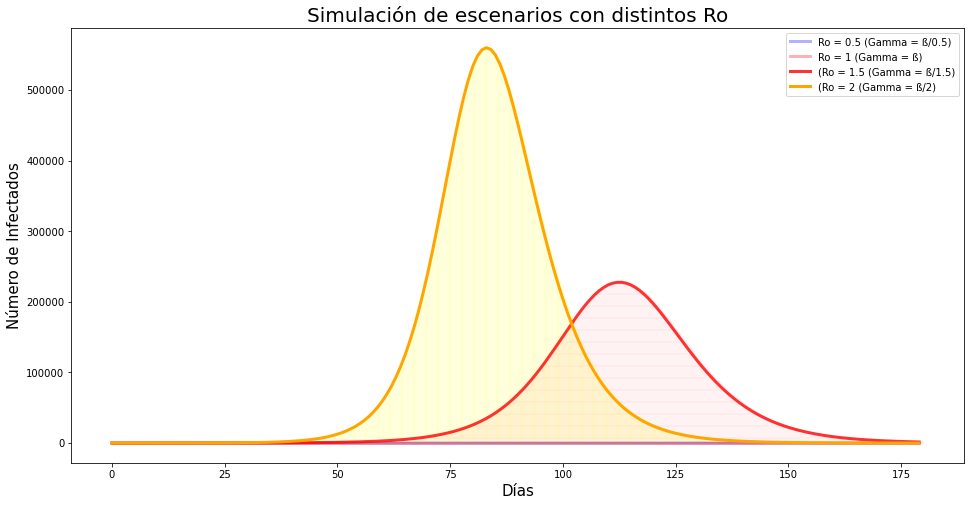

In [26]:
fig, ax = plt.subplots(figsize=(16,8))

# variable x = evolución de los días
t = np.linspace(0, T, T)
ax.plot(I1,color ='blue', alpha = 0.3 , linewidth =3, label = 'Ro = 0.5 (Gamma = ß/0.5)'  )
ax.plot(I2,color ='red', alpha = 0.3 , linewidth =3, label = 'Ro = 1 (Gamma = ß)'  )
ax.plot(I3,color ='red', alpha = 0.8, linewidth =3, label = '(Ro = 1.5 (Gamma = ß/1.5)'  )
ax.plot(I4,color ='orange', alpha =  1, linewidth =3, label = '(Ro = 2 (Gamma = ß/2)'  )

ax.fill_between(t,I3, color = 'red', alpha = 0.05, hatch = '-', joinstyle = 'round' )
ax.fill_between(t,I4, color = 'yellow', alpha = 0.14, hatch = '|', joinstyle = 'round' )


plt.title('Simulación de escenarios con distintos Ro', fontsize =20)

ax.legend()

plt.xlabel('Días', fontsize=15)
plt.ylabel('Número de Infectados', fontsize=15)

plt.savefig("Simulacion_de_escenarios_con_distintos_Ro_zoom_(gamma).png")
plt.show()

In [27]:
pico = str(round(I1.max(),0))
print ("En el máximo llega a haber:   " + pico + "   infectados")

np.where(I1 == np.max(I1))

En el máximo llega a haber:   4.0   infectados


(array([0]),)

In [28]:
pico = str(round(I2.max(),0))
print ("En el máximo llega a haber:   " + pico + "   infectados")

np.where(I2 == np.max(I2))

En el máximo llega a haber:   4.0   infectados


(array([0]),)

In [29]:
pico = str(round(I3.max(),0))
print ("En el máximo llega a haber:   " + pico + "   infectados")

np.where(I3 == np.max(I3))

En el máximo llega a haber:   227669.0   infectados


(array([113]),)

In [30]:
pico = str(round(I4.max(),0))
print ("En el máximo llega a haber:   " + pico + "   infectados")

np.where(I4 == np.max(I4))

En el máximo llega a haber:   560041.0   infectados


(array([83]),)

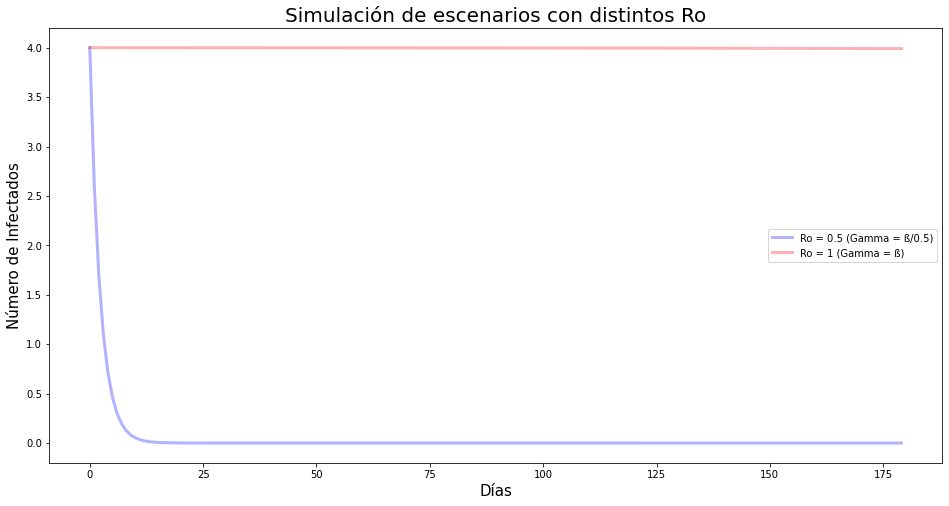

In [31]:
fig, ax = plt.subplots(figsize=(16,8))

# variable x = evolución de los días
t = np.linspace(0, T, T)
ax.plot(I1,color ='blue', alpha = 0.3 , linewidth =3, label = 'Ro = 0.5 (Gamma = ß/0.5)'  )
ax.plot(I2,color ='red', alpha = 0.3 , linewidth =3, label = 'Ro = 1 (Gamma = ß)'  )
plt.title('Simulación de escenarios con distintos Ro', fontsize =20)



ax.legend()

plt.xlabel('Días', fontsize=15)
plt.ylabel('Número de Infectados', fontsize=15)

plt.savefig("Simulacion_de_escenarios_con_distintos_Ro_(gamma).png")
plt.show()



- La tendencia es la misma, es decir, el número de infectados en función del tiempo con los distintos Ro tiene el mismo comportamiento que en el caso anterior pero con valores distintos. 
- En el caso de Ro=1 el número de infectados permanece constante en 4 mientras que con Ro=0.5 el número de infectados decrece. 
- Ro=1.5 y Ro=2 implica que el número de infectados llega a un máximo y luego decrece. Igual que en el caso anterior, un Ro más chico retrasa en el tiempo este pico y a su vez el pico alcanza un nivel de infectados menor. 
- Con Ro=1.5 el pico es en el día 113 y alcanza un máximo de 227669 infectados (6,5% de la población) mientras que con Ro=2, el pico ocurre en el dia 83 y hay 560041 infectados (16% de la población). 


- Es más efectiva una reducción en la tasa de contacto que una disminución en los días que un infectado tarda en recuperarse para lograr un mismo valor de Ro ya que con la reducción en la tasa de contacto se logra que el pico sea mucho más lejos en el tiempo. Lo que le da la posibilidad al sistema de salud a prepararse en términos de recursos, por ejemplo más respiradores y a su vez que el pico tarde en ser alcanzado significa más tiempo para los investigadores para conocer más sobre esta enfermedad así tratar a los infectados de una forma más efectiva. 
- Con Ro=1.5, con γ cte se alcanza el pico en el día 530 mientras que con el mismo Ro y β constante se alcanza en el día 113. Con γ constante y con la posibilidad de reducir β el pico alcanza un poco menos de infectado pero la diferencia más importante se ve en los días que demora en llegar el pico. 

### 6) ¿Hay alguna condición algebraica que implique los resultados que se obtienen en el punto anterior?

Observando la gráfica se puede concluir que el número de infectados en función del tiempo cambia su comportamiento dependiendo del valor de Ro: 
- Ro < 1: La enfermedad desaparece tras un cierto período de tiempo (β<γ)
- Ro > 1: La enfermedad se propaga ampliamente entre la población (β>γ)
- Ro = 1: El número de infectados permanece constante (igual al número inicial) a lo largo del tiempo (β=γ)

Por lo tanto el valor de Ro se puede interpretar como cuántas veces mayor o menor es la velocidad de transmición de la enfermedad con respecto a la velocidad de recuperación, consecuentemente el objetivo del gobierno es reducir Ro.  Por ejemplo, si el primer individuo que tiene la enfermedad se la transmite a otras 3, Ro=3. 

Se puede expresar esta idea mediante una representación gráfica que se puede observar más abajo. 
- Cuando Ro=2, lo que significa es que cada individuo que se infecta contagia a dos individuos a lo largo de todo su período de contagio, y esos dos individuos van a contagiar cada uno a dos individuos más y así hasta que el número de individuos pertenecientes al grupo de suceptibles sea cero. Los individuos infectados están representados con circunferencias rojas mientras que los individuos suceptibles están representados con circunferencias amarillas. En el diagrama se puede visualizar que el individuo A es el que desarrolla la enfermedad. A contagia al individuo B y C, por otro lado C contagia a G y F mientras que B contagia a E y D. Luego G contagia a N y O, F contagia a L y M y continua de esta forma. Es decir que el número de infectados crece exponencialmente. Esta es una manera de entender por qué un R0>1 hace que la enfermedad se propague rápidamente lo que ocasiona que se convierta en una pandemia mundial. 



- En el segundo diagrama está representado el esenario con Ro=1, que establece que cada individuo infectado contagia a solo un individuo. El individuo A solo contagia a B, el B solo a C, el C solo a D y así sucesivamente. El número de infectados permanece constante a lo largo del tiempo porque ocurre cuando gama es igual a beta. 



- En el tercer diagrama se visualiza el caso donde Ro<1. La enfermedad va a desaparecer de la población porque en promedio una persona infectada va a contagiar a menos de una persona suceprtible.

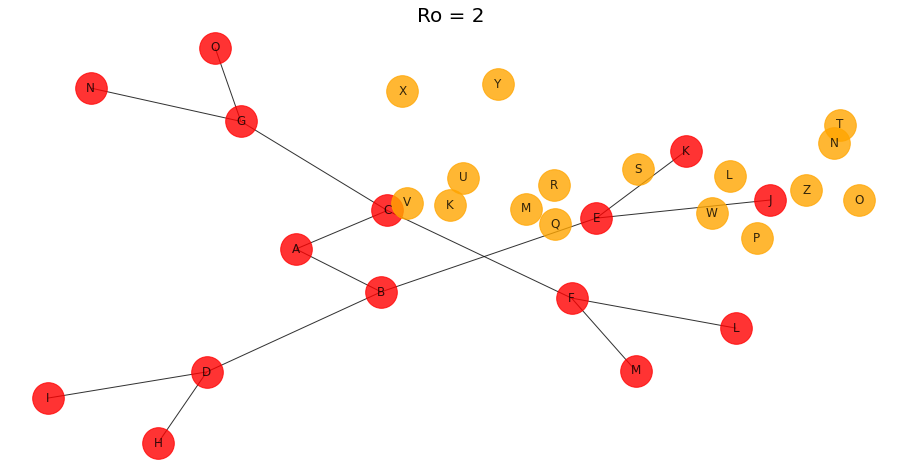

In [32]:
fig, ax = plt.subplots(figsize=(16,8))

df1 = pd.DataFrame({ 'from':['A', 'A', 'B','B','C','C','D','D','E','E','F','F','G','G'], 'to':['B', 'C', 'D','E','F','G','H','I','J','K','L','M','N','O']})
df2 = pd.DataFrame({ 'from':['K','L','M', 'N', 'O','P', 'Q', 'R', 'S', 'T','U','V','W','X','Y','Z'], 'to':['K','L','M', 'N', 'O','P', 'Q', 'R', 'S', 'T','U','V','W','X','Y','Z']})

G1=nx.from_pandas_edgelist(df1, 'from', 'to')
G2=nx.from_pandas_edgelist(df2, 'from', 'to')
 

nx.draw(G1, with_labels=True, node_size=1000, node_color="red", alpha = 0.8, pos=nx.spring_layout(G1))
nx.draw(G2, with_labels=True, node_size=1000, node_color="orange", alpha = 0.8, pos=nx.random_layout(G2))
plt.title("Ro = 2 ", fontsize = 20)
plt.savefig("dot_diagram_ro=2.png")

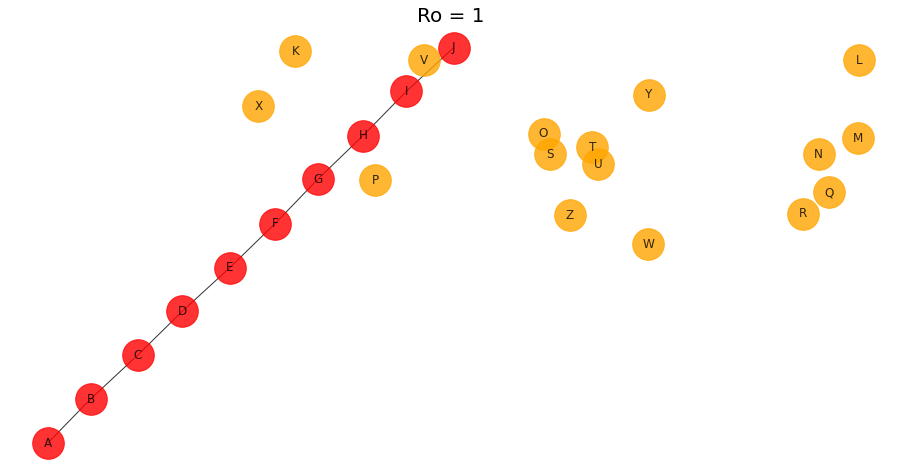

In [33]:
fig, ax = plt.subplots(figsize=(16,8))

df1 = pd.DataFrame({ 'from':['J','I','H', 'G', 'F','E', 'D', 'C', 'B'], 'to':['I', 'H','G','F','E', 'D', 'C', 'B','A',]})
df2 = pd.DataFrame({ 'from':['K','L','M', 'N', 'O','P', 'Q', 'R', 'S', 'T','U','V','W','X','Y','Z'], 'to':['K','L','M', 'N', 'O','P', 'Q', 'R', 'S', 'T','U','V','W','X','Y','Z']})

G1=nx.from_pandas_edgelist(df1, 'from', 'to')
G2=nx.from_pandas_edgelist(df2, 'from', 'to')
 

nx.draw(G1, with_labels=True, node_size=1000, node_color="red", alpha = 0.8, pos=nx.kamada_kawai_layout(G1))
nx.draw(G2, with_labels=True, node_size=1000, node_color="orange", alpha = 0.8, pos=nx.random_layout(G2))
plt.title("Ro = 1 ", fontsize = 20)
plt.savefig("dot_diagram_ro=1.png")

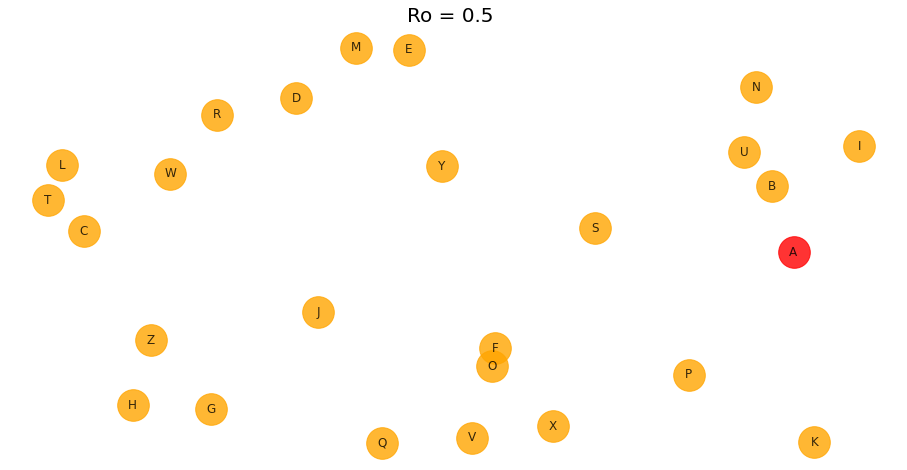

In [34]:
fig, ax = plt.subplots(figsize=(16,8))

df1 = pd.DataFrame({ 'from':['B', 'C','D','E','F','G','H','I','J','K','L','M', 'N', 'O','P', 'Q', 'R', 'S', 'T','U','V','W','X','Y','Z'], 'to':['B','C','D','E','F','G','H','I','J','K','L','M', 'N', 'O','P', 'Q', 'R', 'S', 'T','U','V','W','X','Y','Z']})
df2 = pd.DataFrame({ 'from':['A'], 'to':['A']})


G1=nx.from_pandas_edgelist(df1, 'from', 'to')
G2=nx.from_pandas_edgelist(df2, 'from', 'to')
 

nx.draw(G1, with_labels=True, node_size=1000, node_color="orange", alpha = 0.8, pos=nx.random_layout(G1))
nx.draw(G2, with_labels=True, node_size=1000, node_color="red", alpha = 0.8, pos=nx.random_layout(G2))
plt.title("Ro = 0.5 ", fontsize = 20)
plt.savefig("dot_diagram_ro=0.5.png")

### 7) Explique a sus lectores qué significa “aplanar la curva” intuitivamente. Además, explique cómo el distanciamiento, el lavado de manos y otras medidas, pueden ayudar a “aplanar la curva”. En particular, explique qué parámetros del modelo se ven afectados por estas medidas y cuáles no.

El término aplanar la curva hace referencia a frenar la propagación del virus, haciendo que el número de casos se distribuya en el tiempo en vez de experimentar un fuerte pico al principio. Hoy en día aplanar la curva es un objetivo crucial ya que cuando todos se enferman a la vez, la cantidad de personas que necesitan hospitalización puede superar la capacidad del sistema de atención médica ya sea en recursos materiales o humanos. Esto significa que es posible que los pacientes muy enfermos no reciban el tratamiento adecuado. Esto sucedió en el pico de la infección por COVID-19 en Italia. Por otra parte, si la misma cantidad de personas se enferma durante un período más largo, menos personas necesitan hospitalización al mismo tiempo entonces el sistema de atención médica no resulta colapsado y todos pueden recibir tratamiento. 


El objetivo clave para aplanar la curva es reducir la propagación de la enfermedad,lo que significa tomar medidas para proteger a la población del virus. Algunas de estas medidas de prevención de propagación del COVID-19 son el lavado de manos, el distanciamiento social, el aislamiento y la desinfección. Estas medidas reducen los contagios diarios y, por lo tanto, aplanan la curva epidémica.  


En la pregunta 5 se puede visualizar cómo cambia la gráfica de el número de infectados en función del tiempo dependiendo de los valores de R0. Se llega a la conclusión que un R0 más bajo es capaz de aplanar la curva, el pico de los infectados ocurre a más lejos en el tiempo y el máximo de infectados también es menor. Si muchas personas se enferman en un período corto, la curva es empinada. Si el mismo número de personas se enferma durante un período más largo, la curva tiene una forma más plana con una pendiente más suave. Esto ocurre porque R0 depende de los dos parámetros β y γ. Las medidas de prevención de la propagación del virus mencionadas anteriormente afectan el parámetro β que es la tasa efectiva de contagio dado un contacto con infectado, muestra que tan rápido se transmite la infección de un individuo a otro. Por lo tanto, si los individuos de una población cumplen un distanciamiento social adecuado, con un lavado de manos frecuentes y los individuos infectados son capaces de permanecer aislados, la tasa de contacto β se reduce. Consecuentemente el valor de R0 también disminuye y la curva epidémica también disminuye. 


En la gráfica de abajo se muestra que si se logra bajar β mediante estas medidas, R0 disminuye y se aplana la curva. La curva roja representa el caso en donde ninguna medida para disminuir la propagación del virus fue tomada y por lo tanto el pico de infectados es anterior en el tiempo mientras que cuando se aplican estas medidas y β disminuye, la sociedad es capaz de atrasar el pico en el tiempo logrando aplanar la curva. La curva azul representa este caso. 




In [35]:
# Hallamos el sendero de infectados, recuperados y susceptibles ---------------

# Primero definimos las condiciones iniciales.

# Población total
N = 3500000

# Número inicial de personas infectadas
I0 = 4

# Número inicial de recuperados
R0 = 0

# El resto de la población es susceptible a contraer la enfermedad
S0 = N - I0 - R0

# Tasa de contacto

beta1 = 1.5*gamma

beta2 = 2*gamma

# Proporción de los infectados que se recuperan por día. El denominador es
# cantidad de días promedio que tarda un infectado en recuperarse
gamma = (1/21) 

# Cantidad de días a analizar
T = 580
# Vector de condiciones iniciales
y0 = S0, I0, R0

# Hallar el sendero de cada una de las tres variables utilizando la función
# ecuaciones_sir
S1, I1, R1 = ecuaciones_sir(y0,T, N,beta1,gamma)
S2, I2, R2 = ecuaciones_sir(y0,T, N,beta2,gamma)


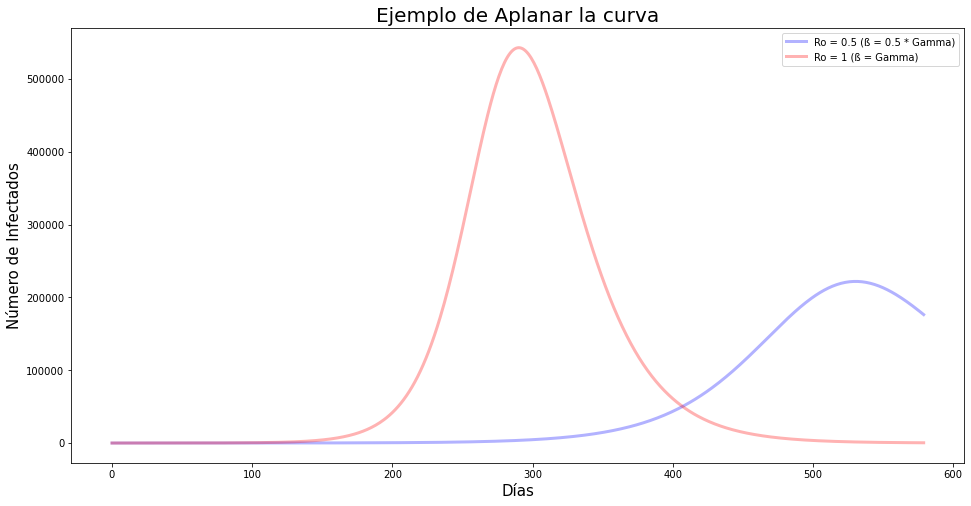

In [36]:
fig, ax = plt.subplots(figsize=(16,8))

# variable x = evolución de los días
t = np.linspace(0, T, T)
ax.plot(I1,color ='blue', alpha = 0.3 , linewidth =3, label = 'Ro = 0.5 (ß = 0.5 * Gamma)'  )
ax.plot(I2,color ='red', alpha = 0.3 , linewidth =3, label = 'Ro = 1 (ß = Gamma)'  )


plt.title('Ejemplo de Aplanar la curva', fontsize =20)

ax.legend()

plt.xlabel('Días', fontsize=15)
plt.ylabel('Número de Infectados', fontsize=15)

plt.savefig("Aplanar_la_curva.png")
plt.show()


### 8) Se estima que aproximadamente el 10% de las personas con COVID-19 son infectados graves que requieren internación. Para ello, muestre en una sola gráfica la evolución de los infectados graves en dos escenarios: un  escenario con confinamiento y sin confinamiento . Además, agregue a la gráfica una línea horizontal con la capacidad de camas de CTI en Uruguay (son aproximadamente 900). Utilice la gráfica para explicar por qué es importante “aplanar la curva”.

In [37]:
#Creamos la función ecuaciones_sirg
def ecuaciones_sirg(y, T, N, beta, gamma):

    S0, I0, R0 = y
    S = np.zeros(T)
    I = np.zeros(T)
    R = np.zeros(T)
    G = np.zeros(T)

    
    S[0] = S0
    I[0] = I0
    R[0] = R0
    G[0] = I0

     
    
    
    for t in range(0,T-1):
        S[t+1] = S[t]-((S[t]*beta*I[t])/N)
        I[t+1] = I[t]+((S[t]*beta*I[t])/N)-(I[t]*gamma)
        R[t+1] = R[t]+ (I[t]*gamma)
        G[t+1] = I[t+1]*0.1
        
    return S, I, R, G
        

N = 3500000

# Número inicial de personas infectadas
I0 = 4

# Número inicial de recuperados
R0 = 0

# El resto de la población es susceptible a contraer la enfermedad
S0 = N - I0 - R0

# Tasa de contacto
beta1 = 0.35  #sin confinamiento
beta2 = gamma*2 # Confinamiento alto
beta3 = gamma*3 # Confinamiento medio
beta4 = gamma*4 # Confinamiento bajo

# Proporción de los infectados que se recuperan por día. El denominador es
# cantidad de días promedio que tarda un infectado en recuperarse
gamma = (1/21) 

# Cantidad de días a analizar
T = 500  #(6 x 30)

# Vector de condiciones iniciales
y0 = S0, I0, R0        
        
S1,I1,R1,G1 = ecuaciones_sirg(y0, T, N, beta1, gamma)
S2,I2,R2,G2 = ecuaciones_sirg(y0, T, N, beta2, gamma)
S3,I3,R3,G3 = ecuaciones_sirg(y0, T, N, beta3, gamma)
S4,I4,R4,G4 = ecuaciones_sirg(y0, T, N, beta4, gamma)

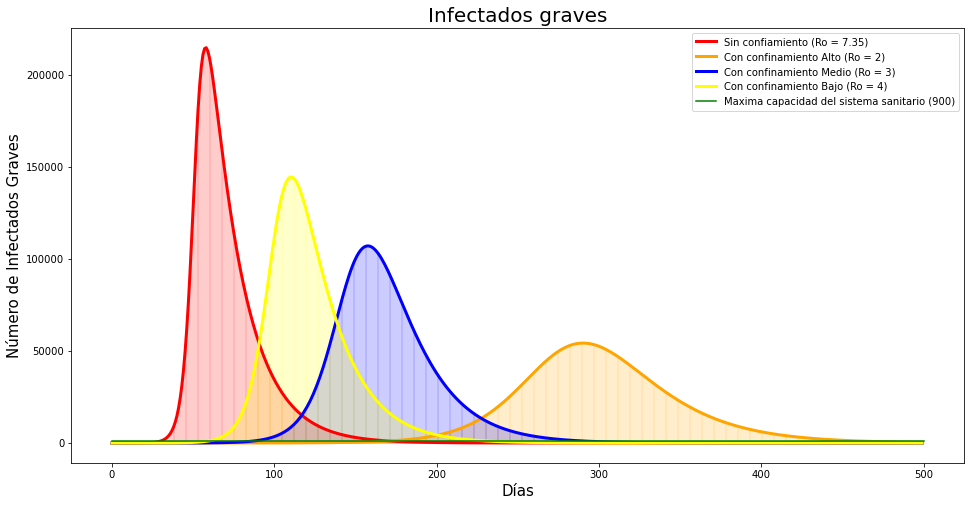

In [38]:
fig, ax = plt.subplots(figsize=(16,8))

# variable x = evolución de los días
t = np.linspace(0, T, T)
ax.plot(G1,color ='red', linewidth =3, label = 'Sin confiamiento (Ro = 7.35)'  )
ax.plot(G2,color ='orange', linewidth =3, label = 'Con confinamiento Alto (Ro = 2)'  )
ax.plot(G3,color ='blue', linewidth =3, label = 'Con confinamiento Medio (Ro = 3)'  )
ax.plot(G4,color ='yellow', linewidth =3, label = 'Con confinamiento Bajo (Ro = 4)'  )

ax.fill_between(t,G1, color = 'red', alpha = 0.2, hatch = '|', joinstyle = 'round' )
ax.fill_between(t,G2, color = 'orange', alpha = 0.2, hatch = '|', joinstyle = 'round' )
ax.fill_between(t,G3, color = 'blue', alpha = 0.2, hatch = '|', joinstyle = 'round' )
ax.fill_between(t,G4, color = 'yellow', alpha = 0.2, hatch = '|', joinstyle = 'round' )


plt.title('Infectados graves', fontsize =20)



ax.plot([0,500], [900,900], color = 'green', label = 'Maxima capacidad del sistema sanitario (900)')
ax.legend()

plt.xlabel('Días', fontsize=15)
plt.ylabel('Número de Infectados Graves', fontsize=15)

plt.savefig("infectados_graves_con_distintos_confinamientos.png")
plt.show()

In [39]:
G1[29]

847.9689732303664

In [40]:
G1[30]

1103.5462445685419

In [41]:
G2[166]

894.4717693183319

In [42]:
G2[167]

936.6292472541984

In [43]:
G3[84]

829.2031947917912

In [44]:
G3[85]

907.7536708908578

In [45]:
G4[57]

805.4620842504855

In [46]:
G4[58]

920.0571672054207

### Viendo más de cerca el confinamiento Alto (Ro = 2)

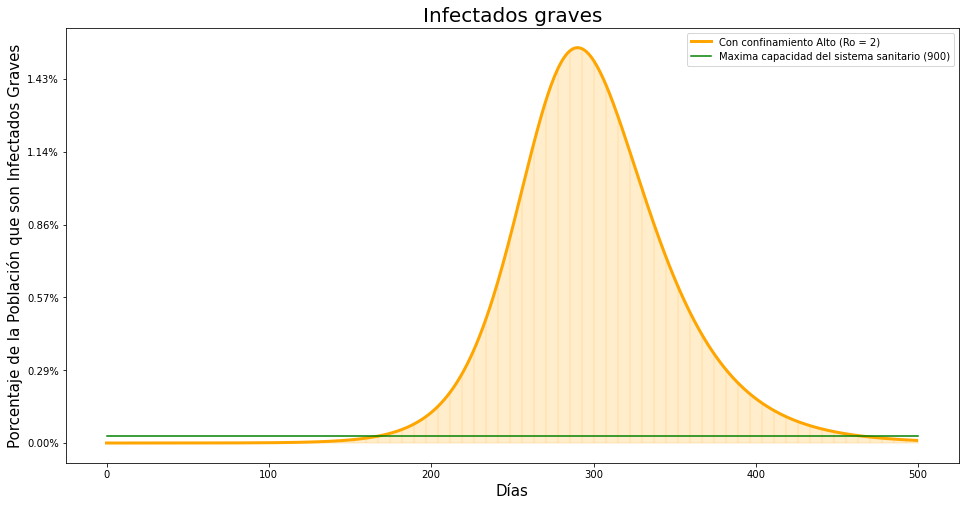

In [47]:
fig, ax = plt.subplots(figsize=(16,8))

# variable x = evolución de los días
t = np.linspace(0, T, T)

ax.plot(G2,color ='orange', linewidth =3, label = 'Con confinamiento Alto (Ro = 2)'  )


ax.fill_between(t,G2, color = 'orange', alpha = 0.2, hatch = '|', joinstyle = 'round' )


plt.title('Infectados graves', fontsize =20)

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 3500000))


ax.plot([0,500], [900,900], color = 'green', label = 'Maxima capacidad del sistema sanitario (900)')
ax.legend()

plt.xlabel('Días', fontsize=15)
plt.ylabel('Porcentaje de la Población que son Infectados Graves', fontsize=15)


plt.savefig("infectados_graves_con_confinamiento_alto.png")
plt.show()

En la gráfica se puede visualizar tres casos distintos de confinamiento y un caso de sin confinamiento. La cuarentena es una medida de prevención de propagación del virus, y lo que genera es minimizar los contactos personales ya que se intenta que los individuos permanezcan aislados, cirulando lo menos posible, haciendo teletrabajo y cerrando lugares en donde se genera una acumulación de personas. Consecuentemente a tasa de contacto beta disminuye. Estos son los tres casos de confinamiento representados en la gráfica de más arriba. Dependiendo de cuánto los individuos cumplan la cuarentena, lo que se logra reducir el beta. Un beta más chico, significa que el confinamiento es alto, mientras que un beta más grande significa que las personas siguen teniendo contactos por lo tanto no disminuye tanto este parámetro y el confinamiento es bajo. El caso de sin confinamiento, es el esenario inicial donde hay una tasa de contacto de 0.35. 


Se puede observar que en ningún caso, las 900 camas del CTI son capaces de cubrir el pico de infectados en la población. Sin embargo, se muestra como aplanando la curva, es decir un beta más pequeño que significa una cuarentena más estricta atrasa el pico en el tiempo y el número de individuos infectados por día es menor (esto se ve en la diferencia de infectados de un día a otro). Sin confinamiento, del día 29 al 30, los infectados graves activos en ese momento son mayores a 900 por lo cual el sistema de salud colapsa ya que no todos los individuos pueden ser atendidos con una cama en el CTI.Del día 29 al 30 hay 256 nuevos infectados graves.  

Por otra parte, con confinamiento bajo ya se logra atrasar un poco este colapso del sistema de salud en el tiempo y disminuir los casos nuevos de infectados graves por día. Del día 57 al día 58 hay 114 casos nuevos de individuos graves y en esos días es cuando el CTI colapsa, no tienen más camas para darle a sus nuevos pacientes. 

Con confinamiento medio, el colapso ocurre del día 84 al 85 con 79 casos nuevos de individuos graves. Mientras que con confinamiento alto, se logra atrasar el colapso del CTI hasta el día 167. Del día 166 al 167 hay 42 nuevos infectados graves. 

Observando está gráfica con distintos confinamientos se observa por qué es tan importante aplanar la curva y se logra entender porque las políticas del gobierno tienen como objetivo distribuir el número de infectados a lo largo del tiempo mediante el confinamiento ya que aplana la curva, y se logra llevar el pico hacia más adelante y reducir los casos nuevos de infectados por día. Si bien con el confinamiento más alto, luego del día 166 no se logra  atender a todos los pacientes infectados graves, le da margen de tiempo a los investigadores para conocer la enfermedad, avanzar en una posible vacuna,medicamentos o medidas curativas, que reduzcan el tiempo en que un infectado grave debe estar utilizando una cama en CTI y así con más información y conociemiento poder seguir aplanando la curva epidémica. 

### 9) Explique qué es una “segunda ola” y por qué el modelo SIR básico no es capaz de generarla.

 La "segunda ola"  hace referencia a un nuevo pico generado más adelante en el tiempo, es decir un rebrote de la infección que llega a ser tan grande o mayor que el primero.

 Pero el modelo SIR no es capaz de generarla, ya que el ß es constante en todo momento. 



### Adaptación del modelo SIR para  generar una "segunda ola"

- Se agrega un nuevo Beta, llamemos le Beta2, que sera el beta que entrará a jugar luego de cierto momento en el tiempo.

In [48]:
def ecuaciones_sir_segunda_ola(y, T, N, beta1, beta2, beta3 , gamma):

    S0, I0, R0 = y
    S = np.zeros(T)
    I = np.zeros(T)
    R = np.zeros(T)
    

    
    S[0] = S0
    I[0] = I0
    R[0] = R0
    

     
    
    
    for t in range(0,T-1):
        if t < 100:
            
            S[t+1] = S[t]-((S[t]*beta1*I[t])/N)
            I[t+1] = I[t]+((S[t]*beta1*I[t])/N)-(I[t]*gamma)    #primer periodo sin cuarentena
            R[t+1] = R[t]+ (I[t]*gamma)                         # Beta moderado
            
        elif t < 250:
            
            S[t+1] = S[t]-((S[t]*beta2*I[t])/N)
            I[t+1] = I[t]+((S[t]*beta2*I[t])/N)-(I[t]*gamma)    #segundo periodo con cuarentena
            R[t+1] = R[t]+ (I[t]*gamma)                         # Beta menor
        
        else:
            
            S[t+1] = S[t]-((S[t]*beta3*I[t])/N)                 #tercer periodo con descuido de la sociedad
            I[t+1] = I[t]+((S[t]*beta3*I[t])/N)-(I[t]*gamma)    # ("segunda ola")
            R[t+1] = R[t]+ (I[t]*gamma)                         # Beta mayor
            
        
    return S, I, R


N = 3500000

# Número inicial de personas infectadas
I0 = 4

# Número inicial de recuperados
R0 = 0

# El resto de la población es susceptible a contraer la enfermedad
S0 = N - I0 - R0

# Tasa de contacto
beta1 = 0.18  #Betas dinamicos en el tiempo, tres distintos.
beta2 = 0.01
beta3 = 0.4

# Proporción de los infectados que se recuperan por día. El denominador es
# cantidad de días promedio que tarda un infectado en recuperarse
gamma = (1/21) 

# Cantidad de días a analizar
T = 365  

# Vector de condiciones iniciales
y0 = S0, I0, R0        
        
S,I,R = ecuaciones_sir_segunda_ola(y0, T, N, beta1, beta2, beta3, gamma)



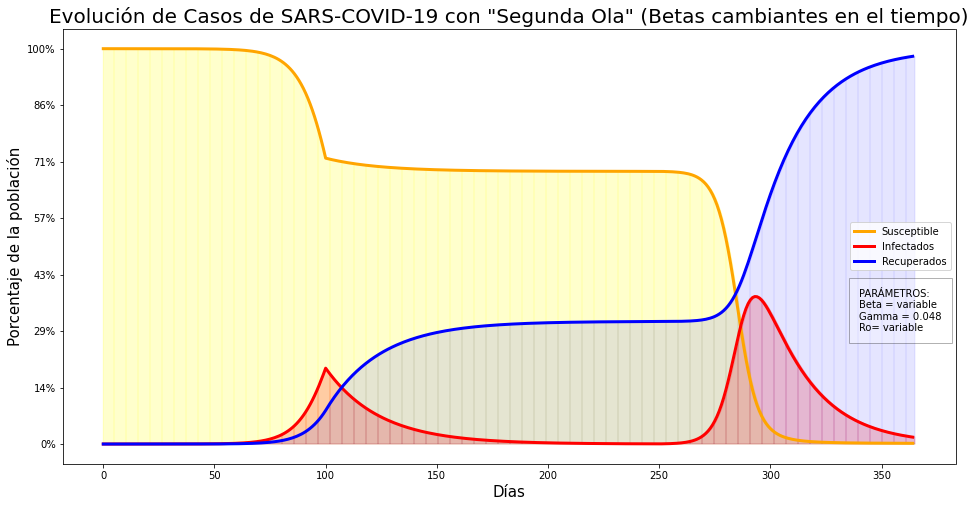

In [49]:
# Grafiquemos la evolución de las tres variables a lo largo del tiempo -------

fig, ax = plt.subplots(figsize=(16,8))

# variable x = evolución de los días
t = np.linspace(0, T, T)

ax.plot(S,color ='orange', linewidth =3, label = 'Susceptible' )
ax.fill_between(t,S, color = 'yellow', alpha = 0.2, hatch = '|', joinstyle = 'round')

ax.plot(I,color = 'red', linewidth = 3, label = 'Infectados')
ax.fill_between(t,I, color = 'red', alpha = 0.2, hatch = '|', joinstyle = 'round')

ax.plot(R, color = 'blue', linewidth = 3, label = 'Recuperados')
ax.fill_between(t,R, color = 'blue', alpha = 0.1, hatch = '|', joinstyle = 'round')

plt.title('Evolución de Casos de SARS-COVID-19 con "Segunda Ola" (Betas cambiantes en el tiempo)', fontsize =20)

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 3500000))


ax.legend()
ax.text(340, 1000000, r"PARÁMETROS: ""\n"r"Beta = variable ""\n"r"Gamma = 0.048""\n"r"Ro= variable" , bbox={'facecolor':'white', 'alpha':0.3, 'pad':10})

plt.xlabel('Días', fontsize=15)
plt.ylabel('Porcentaje de la población',fontsize=15)

plt.savefig("segunda_ola_betas_dinamicos.png")
plt.show()

- Para mostrar y entender qué es una "segunda ola", se utizaron tres valores de beta distintos. Beta es el parámetro que cambia, ya que es el único que depende del comportamiento de la población, por ejemplo beta tienen un distinto valor en un escenario con confinamiento que en otro escenario sin confinamiento. En cambio, gamma es más dificil de hacerlo variar ya que se necesitan avances médicos para reducir el tiempo en el cual un individuo está infectado. 

- El primer valor de beta que es 0,18 representa un caso de sin confinamiento. No se utilizo el caso inicial de beta igual a 0.35 porque este valor de beta genera un pico de infectados muy alto entonces no se puede generar una segunda ola ya que la mayoría de la población ya se contagió muy rápido al comienzo de la enfermedad. 

- Lo que sucede sin confinamiento, es que el número de infectados en la población crece de forma exponencial. Esto hace que el gobierno tome medidas y a su vez genera miedo en la sociedad. El COVID-19 es una enfermedad nueva, que en sus comienzos no se tenía información muy clara de cómo se propagaba, qué pasaba si un individuo se contagiaba y de la gravedad de la enfermedad. Por lo tanto, lo que sucede es que el gobierno incentiva a sus ciudadadnos a cumplir la cuarentena, y debido a esta incertidumbre los individuos la cumplen. Se bajan los contactos personales ya que las personas cortan sus actividades presenciales, como el trabajo, deportes y reuniones. Esto reduce el valor de beta a 0.01 y consecuentemente el número de infectados comienza a bajar sustancialmente. Se logra controlar la situación, los nuevos casos por día son cada vez menores y los centros de salud no colapsan y son capaces de utilizar sus recursos para atender a todos los pacientes que lo necesitan.

- Sin embargo, esta situación no se sostiene en el tiempo indefinidamente. Estas medidas de prevención de propagación de la enfermedad como la cuarentena, son insostenibles económica y socialmente por mucho tiempo. Por lo tanto, como bajaron los casos, el gobierno comienza a revertir medidas, se comienza con la educación y trabajo presencial, se permiten las actividades deportivas, se intenta reactivar la economía por ejemplo abriendo shoppings y las personas comienzan a hacer juntadas. Esto hace que los contactos aumenten y por ende la tasa de contactos aumenta, es decir el beta aumenta. El nuevo valor de beta es 0.4. Al permitir esto, el número de infectados comienza a subir nuevamente generando un rebrote en la socidad, lo que se llama una "segunda ola". 




### 10) Compare sus predicciones de marzo con lo que realmente ocurrió. ¿Qué puede estar detrás de los aciertos o errores?



</center><img src="images/curva_real_uru.png" width=500></center>


### Gráfica Real

- En la gráfica anterior vemos lo que en verdad sucedió con los casos activos de Covid - 19.
- Vemos que el lapso de tiempo de la gráfica es mayor (9 meses) que el de nuestro modelo, en el cual observamos 6 meses.
- La cantidad de casos es mucho menor que nuestro modelo. Esta gráfica muestra la evolución de los casos activos en Uruguay, y se sabe que la población de UrUguay luego del 13 de marzo permaneció en cuarentena. Por lo tanto, se va a comparar estos datos con los resultados obtenidos en la pregunta 5. Se toma la pregunta 5 como referencia, porque se en esta pregunta se disminuye el valor de Ro de 7.35 (pregunta 1) a 2 o 1.5, entonces podemos tomar estos nuevos valores de Ro como una cuarentena en nuestro modelo.
- Se observa que en Uruguay luego de 9 meses hay 1150 casos activos mientras que en nuestro modelo con Ro=1.5, en el día 270 (9 meses) hay 2284 casos activos y Ro=2 en el día 270 hay 465777.  
- En la gráfica se visualiza claramente el primer pico y la "segunda ola".
- Luego del primer pico, hay un período donde decrecen los casos a un ritmo que parecería que la enfermedad se va a erradicar. Esto sucede ya que la población de Uruguay se encontraba en cuarentena y por lo tanto la tasa de contacto diminuyó. 
- Luego de este "valle", los casos activos comienzan a crecer, oscilando, pero con una tendencia a largo plazo a crecer. La segunda ola se causa ya que se reverirtió la medida de la cuarentena, y los inidividuos volvieron a tener mayor contacto entre sí. 
- Vemos que Uruguay no pareceria estar "tan grave". Si nos basamos en la cantidad maxima de camas de CTI de la letra (900) y la tasa con la cual los infectados pasan a ser "graves" (10%), Uruguay podría llegar a 9000 casos activos antes de que colapse el sistema sanitario. A su vez, como esto se demora, quizas ya hay mayor infraestructura como para abastecer una demanda más grande de camas de CTI. En nuestro modelo, con confinamiento alto, el sistema de salud colapsa en el día 167. Mientras que la grafica de Uruguay en ningún momento se llega a 9000 casos activos,por ende, no colapsa el sistema de salud.


### ¿Por qué nuestro modelo falla en estimar con exactitud la realidad?

- El modelo inicial de la pregunta 1, no tiene en cuenta la cuarentena (cambio dramatico en Ro)
- El tasa de contacto en la realidad claramente es otra. En nuestro modelo se toma beta igual a 0.35 lo que genera un Ro = 7.35 entonces si en la realidad estos fueran los verdaderos valores la población se hubiese contagiado mucho más rapido, como muestra nuestro modelo.
<br>
- Otra razón por la cual nuestro modelo difiere de la realidad es por el valor que tomamos como población total. El N no es 3.5 millones por varias razones: 
 - No toda la población es suceptible a contagiarse, por ejemplo se ha demostrado que los niños no contraen la enfermedad.
 - No toda la población esta en contacto con todos, no se toma en cuenta la posición del individuo. Ej: un individuo en Artigas no se va a contagiar  de alguien en Montevideo, en este modelo todos tienen la misma probabilidad de contagio.
 - En el modelo tomamos un Ro fijo, cuando en verdad en el Ro tiene un asepcto dinámico y cambiante en el tiempo
- Los focos se pueden controlar en la realidad, nuestro modelo muestra que todos los contagiados están en contacto con todos los suceptibles. En la realidad, existe el aislamiento y seguimiento.
- Los suceptibles son todos iguales en el modelo SIR, cuando en verdad habría que tomar en cuenta:
 - Grupos etarios
 - Personal médico (mayor chance de contagio)
 - Población de riesgo 
- Tampoco se toma en cuenta que el individuo infectado toma dos días en comenzar a contagiar      



### 11) PREGUNTA BONUS: Asuma que una vacuna efectiva y segura para tratar el COVID-19 es descubierta. Esta vacuna impide que una persona que aún no ha adquirido COVID se enferme, pero no ayuda a las personas que ya están infectadas. Uruguay tiene una capacidad para vacunar a una proporción 𝛼 de su población por día. Muestre cómo cambiaría las ecuaciones del modelo SIR la incorporación de una vacuna de estas características. Por último, muestre en una sola gráfica la evolución de susceptibles e infectados en los próximos 6 meses bajo un escenario con vacuna y otro sin vacuna. Asuma:
- N = 3.5 millones
- I0 = 629 
- R0 = 3103. (Esta es la situación de casos en Uruguay al 13/11/2020.) 
#### Además, asuma que:
- 𝛼 􏰀= 0.01%
- 𝛾 = 􏰁􏰀1/21 
- 𝛽 = 0.2

#### - Alpha va ser la tasa de vacunación efectiva en la cual la gente se pasa del grupo de Suceptibles a Recuperados sin pasar por Infectados

In [50]:
def ecuaciones_sir_vacuna(y, T, N, beta1, gamma, alpha):

    S0, I0, R0 = y
    S = np.zeros(T)
    I = np.zeros(T)
    R = np.zeros(T)
   
    S[0] = S0
    I[0] = I0
    R[0] = R0
   
    
    for t in range(0,T-1):
        
        S[t+1] = S[t]-((S[t]*beta1*I[t])/N) - ((S[t]*alpha))
        I[t+1] = I[t]+((S[t]*beta1*I[t])/N)-(I[t]*gamma)
        R[t+1] = R[t]+ (I[t]*gamma)+ ((S[t]*alpha))
       
    return S, I, R


N = 3500000

# Número inicial de personas infectadas
I0 = 629

# Número inicial de recuperados
R0 = 3103

# El resto de la población es susceptible a contraer la enfermedad
S0 = N - I0 - R0

# Tasa de contacto
beta1 = 0.2  

# Proporción de los infectados que se recuperan por día. El denominador es
# cantidad de días promedio que tarda un infectado en recuperarse
gamma = (1/21) 

#Tasa de vacunacion efectiva 
alpha1 = 0.0001
alpha2 = 0

# Cantidad de días a analizar
T = 180  

# Vector de condiciones iniciales
y0 = S0, I0, R0        
        
S1,I1,R1 = ecuaciones_sir_vacuna(y0, T, N, beta1, gamma, alpha1) #Escenario con vacuna
S2,I2,R2 = ecuaciones_sir_vacuna(y0, T, N, beta1, gamma, alpha2) #Escenario sin vacuna

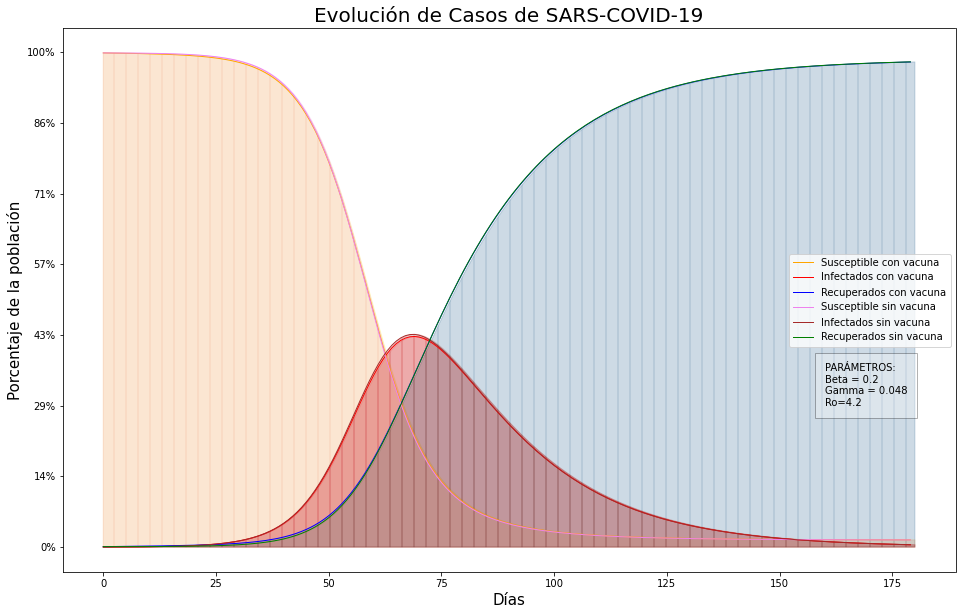

In [51]:
# Grafiquemos la evolución de las tres variables a lo largo del tiempo -------

fig, ax = plt.subplots(figsize=(16,10))

# variable x = evolución de los días
t = np.linspace(0, T, T)


#CON VACUNA
ax.plot(S1,color ='orange', linewidth =1, label = 'Susceptible con vacuna' )
ax.fill_between(t,S1, color = 'yellow', alpha = 0.2, hatch = '|', joinstyle = 'round')

ax.plot(I1,color = 'red', linewidth = 1, label = 'Infectados con vacuna')
ax.fill_between(t,I1, color = 'red', alpha = 0.2, hatch = '|', joinstyle = 'round')

ax.plot(R1, color = 'blue', linewidth = 1, label = 'Recuperados con vacuna')
ax.fill_between(t,R1, color = 'blue', alpha = 0.1, hatch = '|', joinstyle = 'round')


#SIN VACUNA
ax.plot(S2,color ='violet', linewidth =1, label = 'Susceptible sin vacuna' )
ax.fill_between(t,S2, color = 'violet', alpha = 0.2, hatch = '|', joinstyle = 'round')

ax.plot(I2,color = 'brown', linewidth = 1, label = 'Infectados sin vacuna')
ax.fill_between(t,I2, color = 'brown', alpha = 0.2, hatch = '|', joinstyle = 'round')

ax.plot(R2, color = 'green', linewidth = 1, label = 'Recuperados sin vacuna')
ax.fill_between(t,R2, color = 'green', alpha = 0.1, hatch = '|', joinstyle = 'round')



plt.title('Evolución de Casos de SARS-COVID-19', fontsize =20)

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 3500000))


ax.legend()
ax.text(160, 1000000, r"PARÁMETROS: ""\n"r"Beta = 0.2 ""\n"r"Gamma = 0.048""\n"r"Ro=4.2" , bbox={'facecolor':'white', 'alpha':0.3, 'pad':10})

plt.xlabel('Días', fontsize=15)
plt.ylabel('Porcentaje de la población',fontsize=15)

plt.savefig("evolución_casos_con_y_sin_vacuna.png")
plt.show()

### Gráficamente parece no haber ningún cambio, las lineas se sobreponen debido a la escala. Aplicamos un aumento para ver más detalladamente las curvas

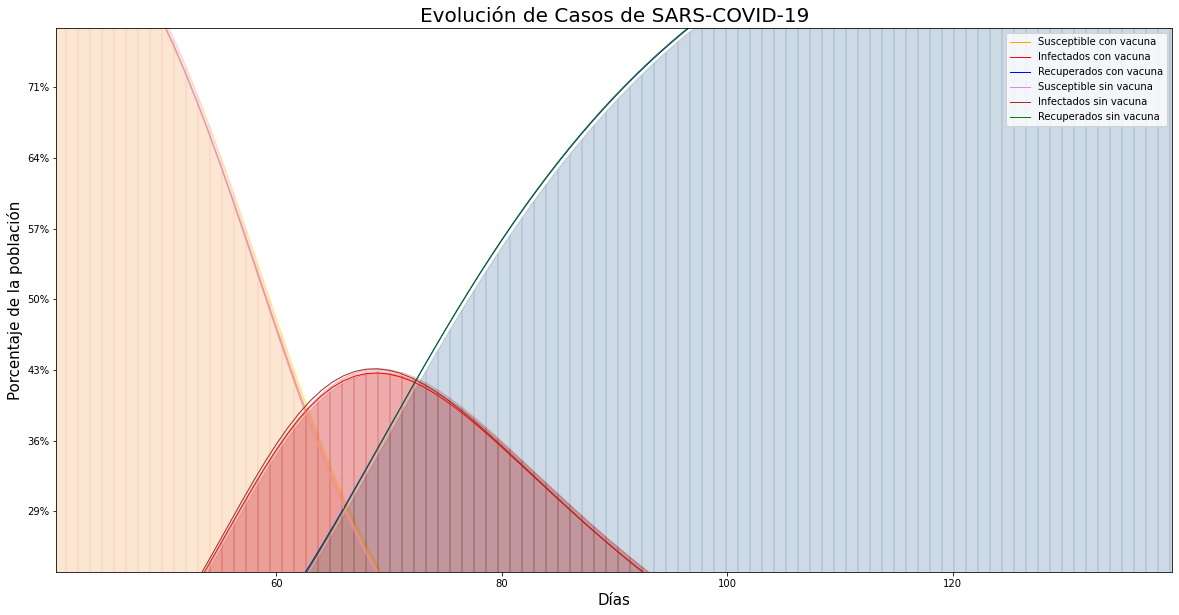

In [52]:
# Grafiquemos la evolución de las tres variables a lo largo del tiempo -------

fig, ax = plt.subplots(figsize=(20,10))

# variable x = evolución de los días
t = np.linspace(0, T, T)


#CON VACUNA
ax.plot(S1,color ='orange', linewidth =1, label = 'Susceptible con vacuna' )
ax.fill_between(t,S1, color = 'yellow', alpha = 0.2, hatch = '|', joinstyle = 'round')

ax.plot(I1,color = 'red', linewidth = 1, label = 'Infectados con vacuna')
ax.fill_between(t,I1, color = 'red', alpha = 0.2, hatch = '|', joinstyle = 'round')

ax.plot(R1, color = 'blue', linewidth = 1, label = 'Recuperados con vacuna')
ax.fill_between(t,R1, color = 'blue', alpha = 0.1, hatch = '|', joinstyle = 'round')


#SIN VACUNA
ax.plot(S2,color ='violet', linewidth =1, label = 'Susceptible sin vacuna' )
ax.fill_between(t,S2, color = 'violet', alpha = 0.2, hatch = '|', joinstyle = 'round')

ax.plot(I2,color = 'brown', linewidth = 1, label = 'Infectados sin vacuna')
ax.fill_between(t,I2, color = 'brown', alpha = 0.2, hatch = '|', joinstyle = 'round')

ax.plot(R2, color = 'green', linewidth = 1, label = 'Recuperados sin vacuna')
ax.fill_between(t,R2, color = 'green', alpha = 0.1, hatch = '|', joinstyle = 'round')



plt.title('Evolución de Casos de SARS-COVID-19', fontsize =20)

fmt = '%.0f%%' 
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 3500000))


ax.legend()
plt.xlabel('Días', fontsize=15)
plt.ylabel('Porcentaje de la población',fontsize=15)


ax.xaxis.zoom(2.5)
ax.yaxis.zoom(2.5)
plt.savefig("evolución_casos_con_y_sin_vacuna_zoom.png")
plt.show()

In [53]:
pico1 = str(round(I1.max(),0))
pico2 = str(round(I2.max(),0))
vidas_salvadas = str((round(I2.max(),0)-(round(I1.max(),0))))

print ("En el máximo con vacunación llega a haber:   " + pico1 + "   infectados")
print ("En el máximo sin vacunación llega a haber:   " + pico2 + "   infectados")
print ("Gracias a la campaña de vacunación contra el COVID -19, evitamos que   " + vidas_salvadas + "   personas se contagiaran")



En el máximo con vacunación llega a haber:   1490055.0   infectados
En el máximo sin vacunación llega a haber:   1504723.0   infectados
Gracias a la campaña de vacunación contra el COVID -19, evitamos que   14668.0   personas se contagiaran


- Sin embargo, al encontrar el máximo punto de ambas curvas de infectados, vemos que logramos evitar que muchas personas tengan la enfermedad. 
- Si estas vacunas fueran distribuidas de forma clave a la población con mayor riesgo o personal de la salud, esto podría tener un mayor impacto que no se ve en este modelo

### Si se pudiera vacunar a más personas por día

Una vez que pase el tiempo, y más paises puedan desarrollar la vacuna, es posible que Uruguay tenga la posibilidad de vacunar en vez de al 0.01% de su población por día, al 0.1% de su población por día. Esto tiene una mejorsa que se puede observar graficamente. 


In [54]:
def ecuaciones_sir_vacuna(y, T, N, beta1, gamma, alpha):

    S0, I0, R0 = y
    S = np.zeros(T)
    I = np.zeros(T)
    R = np.zeros(T)
   
    S[0] = S0
    I[0] = I0
    R[0] = R0
   
    
    for t in range(0,T-1):
        
        S[t+1] = S[t]-((S[t]*beta1*I[t])/N) - ((S[t]*alpha))
        I[t+1] = I[t]+((S[t]*beta1*I[t])/N)-(I[t]*gamma)
        R[t+1] = R[t]+ (I[t]*gamma)+ ((S[t]*alpha))
       
    return S, I, R


N = 3500000

# Número inicial de personas infectadas
I0 = 629

# Número inicial de recuperados
R0 = 3103

# El resto de la población es susceptible a contraer la enfermedad
S0 = N - I0 - R0

# Tasa de contacto
beta1 = 0.2  

# Proporción de los infectados que se recuperan por día. El denominador es
# cantidad de días promedio que tarda un infectado en recuperarse
gamma = (1/21) 

#Tasa de vacunacion efectiva 
alpha1 = 0.001
alpha2 = 0

# Cantidad de días a analizar
T = 180  

# Vector de condiciones iniciales
y0 = S0, I0, R0        
        
S1,I1,R1 = ecuaciones_sir_vacuna(y0, T, N, beta1, gamma, alpha1) #Escenario con vacuna
S2,I2,R2 = ecuaciones_sir_vacuna(y0, T, N, beta1, gamma, alpha2) #Escenario sin vacuna

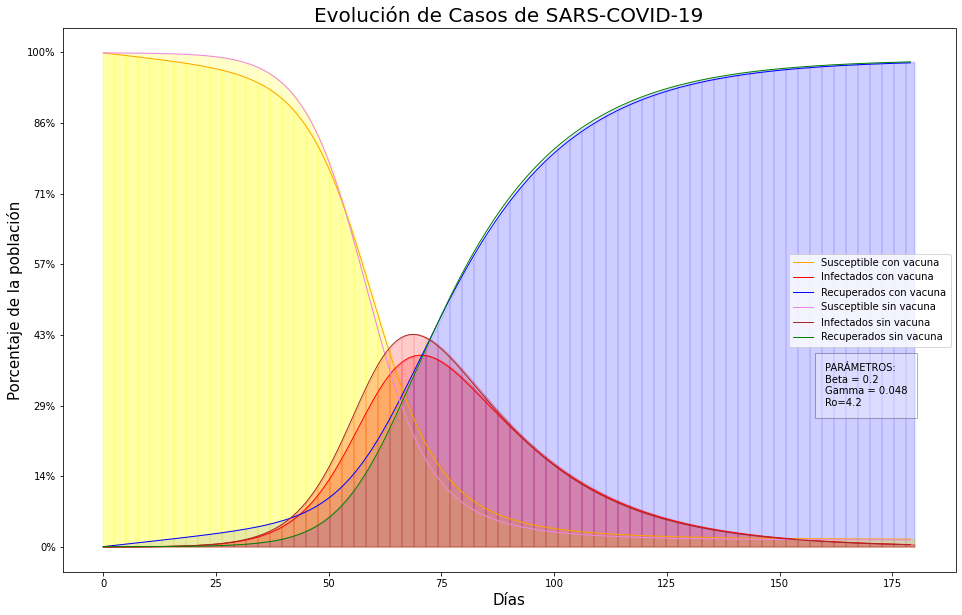

In [55]:
# Grafiquemos la evolución de las tres variables a lo largo del tiempo -------

fig, ax = plt.subplots(figsize=(16,10))

# variable x = evolución de los días
t = np.linspace(0, T, T)


#CON VACUNA
ax.plot(S1,color ='orange', linewidth =1, label = 'Susceptible con vacuna' )
ax.fill_between(t,S1, color = 'yellow', alpha = 0.2, hatch = '|', joinstyle = 'round')

ax.plot(I1,color = 'red', linewidth = 1, label = 'Infectados con vacuna')
ax.fill_between(t,I1, color = 'red', alpha = 0.2, hatch = '|', joinstyle = 'round')

ax.plot(R1, color = 'blue', linewidth = 1, label = 'Recuperados con vacuna')
ax.fill_between(t,R1, color = 'blue', alpha = 0.1, hatch = '|', joinstyle = 'round')


#SIN VACUNA
ax.plot(S2,color ='violet', linewidth =1, label = 'Susceptible sin vacuna' )
ax.fill_between(t,S2, color = 'yellow', alpha = 0.2, hatch = '|', joinstyle = 'round')

ax.plot(I2,color = 'brown', linewidth = 1, label = 'Infectados sin vacuna')
ax.fill_between(t,I2, color = 'red', alpha = 0.2, hatch = '|', joinstyle = 'round')

ax.plot(R2, color = 'green', linewidth = 1, label = 'Recuperados sin vacuna')
ax.fill_between(t,R2, color = 'blue', alpha = 0.1, hatch = '|', joinstyle = 'round')



plt.title('Evolución de Casos de SARS-COVID-19', fontsize =20)

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 3500000))


ax.legend()
ax.text(160, 1000000, r"PARÁMETROS: ""\n"r"Beta = 0.2 ""\n"r"Gamma = 0.048""\n"r"Ro=4.2" , bbox={'facecolor':'white', 'alpha':0.3, 'pad':10})

plt.xlabel('Días', fontsize=15)
plt.ylabel('Porcentaje de la población',fontsize=15)

plt.savefig("evolución_casos_con_y_sin_vacuna_efectiva.png")
plt.show()

In [56]:
pico1 = str(round(I1.max(),0))
pico2 = str(round(I2.max(),0))
vidas_salvadas = str((round(I2.max(),0)-(round(I1.max(),0))))

print ("En el máximo con vacunación llega a haber:   " + pico1 + "   infectados")
print ("En el máximo sin vacunación llega a haber:   " + pico2 + "   infectados")
print ("Gracias a la campaña de vacunación contra el COVID -19, evitamos que   " + vidas_salvadas + "   personas se contagiaran")




En el máximo con vacunación llega a haber:   1357487.0   infectados
En el máximo sin vacunación llega a haber:   1504723.0   infectados
Gracias a la campaña de vacunación contra el COVID -19, evitamos que   147236.0   personas se contagiaran



<br>

***

<br>


## <center> Bibliografía <center>

***

Criterio de citación APA.
- Gallagher, J. (2020, October 22). Covid: Why is coronavirus such a threat? Extraido el 29 de Noviembre de 2020, de https://www.bbc.com/news/health-54648684
- Coronavirus.Uy (2020, November 28)."Casos Activos de COVID 19 Uruguay". Extraido el 28 de Noviembre de 2020, de App Coronavirus.uy